In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import axis
import regex as re
import contractions
import num2words

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
import ujson as json


import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package wordnet to /Users/grandhi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/grandhi/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /Users/grandhi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/grandhi/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/grandhi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer
import numpy as np
from scipy.special import softmax
import csv
import urllib.request
from transformers import pipeline

#https://huggingface.co/cardiffnlp/twitter-roberta-base-emotion?text=I+like+you.+I+love+you

In [28]:
df1 = pd.read_pickle('../data/final_data/preprocess_train_dimbat_2011_type_pred.pkl')
df2 = pd.read_pickle('../data/final_data/preprocess_train_dimbat_2012_type_pred.pkl')
df3 = pd.read_pickle('../data/final_data/preprocess_train_dimbat_2013_type_pred.pkl')
df4 = pd.read_pickle('../data/final_data/preprocess_train_dimbat_2014_type_pred.pkl')
df5 = pd.read_pickle('../data/final_data/preprocess_train_dimbat_2015_type_pred.pkl')
df6 = pd.read_pickle('../data/final_data/preprocess_train_dimbat_2017_type_pred.pkl')
df7 = pd.read_pickle('../data/final_data/preprocess_train_dimbat_2018_type_pred.pkl')

df1['year'] = 2011 
df2['year'] = 2012
df3['year'] = 2013
df4['year'] = 2014
df5['year'] = 2015
df6['year'] = 2017
df7['year'] = 2018



frames = [df1,df2,df3,df4,df5,df6,df7]

df_final = pd.concat(frames)
df_1 = df_final.copy()

In [29]:
df_final['relevance'].unique()

array([ 4,  2,  3,  6,  5,  8,  7,  9, 10,  1])

In [30]:
df_1 = df_1.reset_index()

In [31]:
df_1.sample()

,index,id,text,relevance,text_clean,lemmas,text_lemma,predict,predict_score,year
60823,6135,'575740626550947841',aid agencies to begin helicopter flights to cy...,4,aid agencies to begin helicopter flights to cy...,"[aid, agency, begin, helicopter, flight, cyclo...",aid agency begin helicopter flight cyclone str...,4,0.962158,2015


In [32]:
# Replacing the numbers with Disasters

df_1['relevance'] = df_1['relevance'].replace([1,2,3,4,5,6,7,8,9,10],
                                            ['Biological','Earthquake','Flood','Hurricane & Tornado','Wildfire',
                                            'Industrial','Societal','Transportation','Meteor','Haze'])

df_1['predict'] = df_1['predict'].replace([1,2,3,4,5,6,7,8,9,10],
                                            ['Biological','Earthquake','Flood','Hurricane & Tornado','Wildfire',
                                            'Industrial','Societal','Transportation','Meteor','Haze'])

In [33]:
df = df_1.copy()
df.head()

,index,id,text,relevance,text_clean,lemmas,text_lemma,predict,predict_score,year
0,0,None,cruuuuud. tornado warning for denton county. a...,Hurricane & Tornado,cruuuuud. tornado warning for denton county. a...,"[cruuuuud, tornado, warn, denton, county, tv, ...",work news site helpful cruuuuud,Hurricane & Tornado,0.989399,2011
1,1,None,tornado warning for tarrant county. storm spot...,Hurricane & Tornado,tornado warning for tarrant county. storm spot...,"[tornado, warn, tarrant, county, storm, spotte...",tornado warn storm spotter report funnel cloud...,Hurricane & Tornado,0.988258,2011
2,2,None,tornado on the ground in azle headed right tow...,Hurricane & Tornado,tornado on the ground in azle headed right tow...,"[tornado, ground, azle, head, right, tms]",tornado ground azle head right tms,Hurricane & Tornado,0.989191,2011
3,3,None,us tornado toll rises to <NUMBER> (afp) <URL>,Hurricane & Tornado,us tornado toll rises to (afp),"[tornado, toll, rise, afp]",tornado toll rise afp,Hurricane & Tornado,0.989745,2011
4,4,None,tornado sirens. this is scary.,Hurricane & Tornado,tornado sirens. this is scary.,"[tornado, siren, scary]",tornado siren scary,Hurricane & Tornado,0.989101,2011


In [34]:
def remove_url(text):
    url = re.compile(r'(https?:\/\/)(\s)*(www\.)?(\s)*((\w|\s)+\.)*([\w\-\s]+\/)*([\w\-]+)((\?)?[\w\s]*=\s*[\w\%&]*)*')
    return url.sub(r'', text)

df['text_final'] = df['text_clean'].apply(lambda x: remove_url(x))


#Contractions
df['text_final_1'] = df['text_final'].apply(lambda x: [contractions.fix(word) for word in x.split(' ')])

#joining back the list of items into one string
df['text_final_1'] = [' '.join(map(str, l)) for l in df['text_final_1']]

# Noise Cleaning - spacing, special characters, lowercasing 

df['text_final_1'] = df['text_final_1'].str.lower()
df['text_final_1'] = df['text_final_1'].apply(lambda x: re.sub(r'[^\w\d\s\']+', '', x))
df['text_final_2'] = df['text_final_1'].apply(lambda x: re.sub('[^a-zA-Z]', ' ', x))

#nltk tokenization

df['text_final_1'] = df['text_final_1'].apply(word_tokenize)
df['text_final_2'] = df['text_final_2'].apply(word_tokenize)

# remove stop words

#stop_words = set(stopwords.words('english'))
new_stopwords = ["all", "due", "to", "on", "daily","hashtag",'url','repeat','user','number',
                    'new','one','http','amp','lol','rt']

stop_words = nltk.corpus.stopwords.words('english')
stop_words.extend(new_stopwords)

df['text_final_1'] = df['text_final_1'].apply(lambda x: [word for word in x if word not in stop_words])
df['text_final_1'] = [' '.join(map(str, l)) for l in df['text_final_1']]

df['text_final_2'] = df['text_final_2'].apply(lambda x: [word for word in x if word not in stop_words])
df['text_final_2'] = [' '.join(map(str, l)) for l in df['text_final_2']]


# lemmatization

lemma = nltk.WordNetLemmatizer()

df['text_final_2'] = df['text_final_2'].apply(lambda x: [lemma.lemmatize(word) for word in x ])
df['text_final_2'] = [''.join(map(str, l)) for l in df['text_final_2']]




In [12]:
#dropping few columns and renaming a column

df = df.drop(['id','index','lemmas','text_final','text_final_1','text_clean'],axis=1)


df['text_cloud'] = df['text_final_2']

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

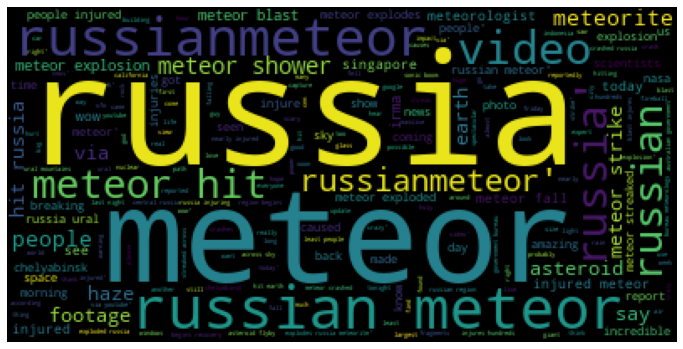

In [41]:
import streamlit as st
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Create text
topic1 = Biological = str(list(df[df['predict'] == 'Biological']['text_final_2']))
topic2 = Earthquake = str(list(df[df['predict'] == 'Earthquake']['text_final_2']))
topic3 = Flood = str(list(df[df['predict'] == 'Flood']['text_final_2']))
topic4 = Hurricane = str(list(df[df['predict'] == 'Hurricane & Tornado']['text_final_2']))
topic5 = Industrial = str(list(df[df['predict'] == 'Industrial']['text_final_2']))
topic6 = Meteor = str(list(df[df['predict'] == 'Meteor']['text_final_2']))
topic7 = Societal = str(list(df[df['predict'] == 'Societal']['text_final_2']))
topic8 = Transportation = str(list(df[df['predict'] == 'Transportation']['text_final_2']))
topic9 = Wildfire = str(list(df[df['predict'] == 'Wildfire']['text_final_2']))




topic = st.selectbox('select topic',['Hurricane', 'Transportation', 'Flood', 'Industrial',
                                    'Earthquake', 'Societal', 'Wildfire', 'Biological', 'Meteor'])

# Create and generate a word cloud image:
def create_wordcloud(topic):
    if topic == 'topic1':
        topic = topic1
    elif topic == 'topic2':
        topic = topic2
    elif topic == 'topic3':
        topic = topic3
    elif topic == 'topic4':
        topic = topic4
    elif topic == 'topic5':
        topic = topic5
    elif topic == 'topic6':
        topic = topic6
    elif topic == 'topic7':
        topic = topic7
    elif topic == 'topic8':
        topic = topic8
    else:
        topic = topic9


    wordcloud = WordCloud().generate(topic)
    return wordcloud


wordcloud = create_wordcloud('topic6')

# Display the generated image:
fig, ax = plt.subplots(figsize = (12, 8))
ax.imshow(wordcloud)
plt.axis("off")
st.pyplot(fig)

In [16]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("j-hartmann/emotion-english-distilroberta-base")

model = AutoModelForSequenceClassification.from_pretrained("j-hartmann/emotion-english-distilroberta-base")

classifier = pipeline("text-classification", tokenizer=tokenizer, model=model)


tweets = list(df['text_final_2'])

output = classifier(tweets)

new_list = pd.DataFrame(output)

In [18]:
new_list = new_list.reset_index()

df_emo = pd.concat([df,new_list], axis=1)
df_emo.head()

,text,relevance,text_lemma,predict,predict_score,year,text_final_2,text_cloud,level_0,index,label,score
0,cruuuuud. tornado warning for denton county. a...,Hurricane & Tornado,work news site helpful cruuuuud,Hurricane & Tornado,0.989399,2011,cruuuuud tornado warning denton county tv work...,cruuuuud tornado warning denton county tv work...,0,0,fear,0.443155
1,tornado warning for tarrant county. storm spot...,Hurricane & Tornado,tornado warn storm spotter report funnel cloud...,Hurricane & Tornado,0.988258,2011,tornado warning tarrant county storm spotters ...,tornado warning tarrant county storm spotters ...,1,1,fear,0.891019
2,tornado on the ground in azle headed right tow...,Hurricane & Tornado,tornado ground azle head right tms,Hurricane & Tornado,0.989191,2011,tornado ground azle headed right toward tms,tornado ground azle headed right toward tms,2,2,neutral,0.461302
3,us tornado toll rises to <NUMBER> (afp) <URL>,Hurricane & Tornado,tornado toll rise afp,Hurricane & Tornado,0.989745,2011,us tornado toll rises afp,us tornado toll rises afp,3,3,sadness,0.562517
4,tornado sirens. this is scary.,Hurricane & Tornado,tornado siren scary,Hurricane & Tornado,0.989101,2011,tornado sirens scary,tornado sirens scary,4,4,fear,0.986093


In [19]:
df_emo.label.value_counts()

neutral     24093
sadness     19752
fear        18932
joy          8174
surprise     5455
anger        5037
disgust       416
Name: label, dtype: int64

In [22]:
# saving the data frame

df_emo.to_csv('../data/data_model.csv',index=False)
df_emo.to_pickle('../data/data_model.pkl')

df_new = pd.read_pickle('../data/data_model.pkl')

In [23]:
df_new

,text,relevance,text_lemma,predict,predict_score,year,text_final_2,text_cloud,level_0,index,label,score
0,cruuuuud. tornado warning for denton county. a...,Hurricane & Tornado,work news site helpful cruuuuud,Hurricane & Tornado,0.989399,2011,cruuuuud tornado warning denton county tv work...,cruuuuud tornado warning denton county tv work...,0,0,fear,0.443155
1,tornado warning for tarrant county. storm spot...,Hurricane & Tornado,tornado warn storm spotter report funnel cloud...,Hurricane & Tornado,0.988258,2011,tornado warning tarrant county storm spotters ...,tornado warning tarrant county storm spotters ...,1,1,fear,0.891019
2,tornado on the ground in azle headed right tow...,Hurricane & Tornado,tornado ground azle head right tms,Hurricane & Tornado,0.989191,2011,tornado ground azle headed right toward tms,tornado ground azle headed right toward tms,2,2,neutral,0.461302
3,us tornado toll rises to <NUMBER> (afp) <URL>,Hurricane & Tornado,tornado toll rise afp,Hurricane & Tornado,0.989745,2011,us tornado toll rises afp,us tornado toll rises afp,3,3,sadness,0.562517
4,tornado sirens. this is scary.,Hurricane & Tornado,tornado siren scary,Hurricane & Tornado,0.989101,2011,tornado sirens scary,tornado sirens scary,4,4,fear,0.986093
...,...,...,...,...,...,...,...,...,...,...,...,...
81854,<HASHTAG> nepalquake hits home for <NUMBER> of...,Earthquake,nepalquake hit home new partner safe wait hear...,Earthquake,0.988045,2018,nepalquake hits home newest partners safe wait...,nepalquake hits home newest partners safe wait...,81854,81854,joy,0.713078
81855,my nepali frnd here is collecting clothes to s...,Earthquake,frnd collect clothe send nepal like v want rul...,Earthquake,0.984679,2018,nepali frnd collecting clothes send nepal says...,nepali frnd collecting clothes send nepal says...,81855,81855,neutral,0.664690
81856,contribute to the nepal earthquake relief effo...,Earthquake,contribute nepal earthquake relief effort,Earthquake,0.989199,2018,contribute nepal earthquake relief effort,contribute nepal earthquake relief effort,81856,81856,neutral,0.332329
81857,<HASHTAG> icymi: global <HASHTAG> redcross is ...,Earthquake,deliver aid nepal way u help nepalquake,Earthquake,0.983335,2018,icymi global redcross delivering aid nepal way...,icymi global redcross delivering aid nepal way...,81857,81857,neutral,0.557852
